# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
api_key = "f56fe2b5befa9cc21f445c20c3e94f9b"

In [20]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    print(city_url)
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1
    
    weather_data = requests.get(city_url).json()

    try:
        print("before city weather")
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print("after city weather")
        print(city_weather)

        print("before city lat")
        city_lat = city_weather["coord"]["lat"]
        print(" after city_lat:",city_lat)
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=qaanaaq
Processing Record 1 of Set 1 | qaanaaq
before city weather
after city weather
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 256.95, 'feels_like': 249.95, 'temp_min': 256.95, 'temp_max': 256.95, 'pressure': 1010, 'humidity': 64, 'sea_level': 1010, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 54, 'gust': 4.42}, 'clouds': {'all': 92}, 'dt': 1674622914, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
before city lat
 after city_lat: 77.484
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=jamestown
Processing Record 2 of Set 1 | jamestown
before city weather
after city weather

before city weather
after city weather
{'coord': {'lon': -135.0107, 'lat': 68.2191}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 253.47, 'feels_like': 246.47, 'temp_min': 253.47, 'temp_max': 253.47, 'pressure': 1025, 'humidity': 94, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 3452, 'wind': {'speed': 4.95, 'deg': 326, 'gust': 8.01}, 'clouds': {'all': 100}, 'dt': 1674623044, 'sys': {'country': 'CA', 'sunrise': 1674586571, 'sunset': 1674602865}, 'timezone': -25200, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}
before city lat
 after city_lat: 68.2191
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=saint-philippe
Processing Record 13 of Set 1 | saint-philippe
before city weather
after city weather
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main':

before city weather
after city weather
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 242.86, 'feels_like': 242.86, 'temp_min': 242.86, 'temp_max': 242.86, 'pressure': 1030, 'humidity': 96, 'sea_level': 1030, 'grnd_level': 1030}, 'visibility': 10000, 'wind': {'speed': 0.26, 'deg': 337, 'gust': 0.24}, 'clouds': {'all': 100}, 'dt': 1674623758, 'sys': {'country': 'RU', 'sunrise': 1674602388, 'sunset': 1674617625}, 'timezone': 39600, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
before city lat
 after city_lat: 68.75
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=warrington
Processing Record 25 of Set 1 | warrington
before city weather
after city weather
{'coord': {'lon': -2.5802, 'lat': 53.3925}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27

before city weather
after city weather
{'coord': {'lon': 40.902, 'lat': -2.2717}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.27, 'feels_like': 298.9, 'temp_min': 298.27, 'temp_max': 298.27, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.38, 'deg': 57, 'gust': 7.12}, 'clouds': {'all': 85}, 'dt': 1674623469, 'sys': {'type': 1, 'id': 5604, 'country': 'KE', 'sunrise': 1674616907, 'sunset': 1674660906}, 'timezone': 10800, 'id': 189741, 'name': 'Lamu', 'cod': 200}
before city lat
 after city_lat: -2.2717
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=asfi
Processing Record 37 of Set 1 | asfi
before city weather
after city weather
{'coord': {'lon': -9.2372, 'lat': 32.2994}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2

before city weather
after city weather
{'coord': {'lon': 72.8944, 'lat': 2.6708}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.78, 'feels_like': 299.78, 'temp_min': 299.78, 'temp_max': 299.78, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 354, 'gust': 3.25}, 'clouds': {'all': 95}, 'dt': 1674623475, 'sys': {'country': 'MV', 'sunrise': 1674609638, 'sunset': 1674652816}, 'timezone': 18000, 'id': 1337607, 'name': 'Kudahuvadhoo', 'cod': 200}
before city lat
 after city_lat: 2.6708
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=port macquarie
Processing Record 49 of Set 1 | port macquarie
before city weather
after city weather
{'coord': {'lon': 152.9167, 'lat': -31.4333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {

before city weather
after city weather
{'coord': {'lon': 14.4283, 'lat': 27.0377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.37, 'feels_like': 281.28, 'temp_min': 283.37, 'temp_max': 283.37, 'pressure': 1014, 'humidity': 32, 'sea_level': 1014, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 6, 'gust': 4.47}, 'clouds': {'all': 3}, 'dt': 1674623772, 'sys': {'country': 'LY', 'sunrise': 1674625857, 'sunset': 1674664666}, 'timezone': 7200, 'id': 2212775, 'name': 'Sabha', 'cod': 200}
before city lat
 after city_lat: 27.0377
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=nizhneyansk
Processing Record 10 of Set 2 | nizhneyansk
before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=ilulissa

before city weather
after city weather
{'coord': {'lon': 57.7, 'lat': -20.4081}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 296.31, 'feels_like': 297.14, 'temp_min': 296.31, 'temp_max': 296.62, 'pressure': 1011, 'humidity': 94}, 'visibility': 7000, 'wind': {'speed': 2.57, 'deg': 340}, 'rain': {'1h': 1.73}, 'clouds': {'all': 75}, 'dt': 1674623758, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1674611273, 'sunset': 1674658476}, 'timezone': 14400, 'id': 934322, 'name': 'Mahébourg', 'cod': 200}
before city lat
 after city_lat: -20.4081
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=hilo
Processing Record 22 of Set 2 | hilo
before city weather
after city weather
{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 294.78, 'feels_like': 295.35

before city weather
after city weather
{'coord': {'lon': -92.1933, 'lat': 14.5094}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.25, 'feels_like': 295.42, 'temp_min': 295.25, 'temp_max': 295.25, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.07, 'deg': 336, 'gust': 2.45}, 'clouds': {'all': 91}, 'dt': 1674623490, 'sys': {'type': 1, 'id': 7171, 'country': 'GT', 'sunrise': 1674563864, 'sunset': 1674605017}, 'timezone': -21600, 'id': 3592086, 'name': 'Ocós', 'cod': 200}
before city lat
 after city_lat: 14.5094
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=hithadhoo
Processing Record 33 of Set 2 | hithadhoo
before city weather
after city weather
{'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations'

before city weather
after city weather
{'coord': {'lon': 159.95, 'lat': -9.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.54, 'feels_like': 306.75, 'temp_min': 302.54, 'temp_max': 302.54, 'pressure': 1006, 'humidity': 70, 'sea_level': 1006, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2.7, 'deg': 67, 'gust': 3.76}, 'clouds': {'all': 94}, 'dt': 1674623210, 'sys': {'country': 'SB', 'sunrise': 1674587722, 'sunset': 1674632938}, 'timezone': 39600, 'id': 2108502, 'name': 'Honiara', 'cod': 200}
before city lat
 after city_lat: -9.4333
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=sur
Processing Record 45 of Set 2 | sur
before city weather
after city weather
{'coord': {'lon': 59.5289, 'lat': 22.5667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 293.19, 'feels_like': 

before city weather
after city weather
{'coord': {'lon': -65.1023, 'lat': -43.3002}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.16, 'feels_like': 289.85, 'temp_min': 291.16, 'temp_max': 291.16, 'pressure': 1009, 'humidity': 32, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 232, 'gust': 8.82}, 'clouds': {'all': 0}, 'dt': 1674623399, 'sys': {'country': 'AR', 'sunrise': 1674637903, 'sunset': 1674690801}, 'timezone': -10800, 'id': 3839307, 'name': 'Rawson', 'cod': 200}
before city lat
 after city_lat: -43.3002
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=lompoc
Processing Record 6 of Set 3 | lompoc
before city weather
after city weather
{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.2, 'feels_lik

before city weather
after city weather
{'coord': {'lon': 46.4667, 'lat': 14.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 290.13, 'feels_like': 289.5, 'temp_min': 290.13, 'temp_max': 290.13, 'pressure': 1017, 'humidity': 62, 'sea_level': 1017, 'grnd_level': 890}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 166, 'gust': 3.29}, 'clouds': {'all': 0}, 'dt': 1674623796, 'sys': {'country': 'YE', 'sunrise': 1674616975, 'sunset': 1674658167}, 'timezone': 10800, 'id': 72181, 'name': 'Marzuq', 'cod': 200}
before city lat
 after city_lat: 14.4
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=sassandra
Processing Record 17 of Set 3 | sassandra
before city weather
after city weather
{'coord': {'lon': -6.0833, 'lat': 4.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.66, 'feels_like': 

before city weather
after city weather
{'coord': {'lon': 28.734, 'lat': -9.3451}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 294.55, 'feels_like': 294.94, 'temp_min': 294.55, 'temp_max': 294.55, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 1.83, 'deg': 351, 'gust': 2.91}, 'clouds': {'all': 100}, 'dt': 1674623512, 'sys': {'country': 'ZM', 'sunrise': 1674619231, 'sunset': 1674664424}, 'timezone': 7200, 'id': 175499, 'name': 'Nchelenge', 'cod': 200}
before city lat
 after city_lat: -9.3451
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=novo horizonte
Processing Record 29 of Set 3 | novo horizonte
before city weather
after city weather
{'coord': {'lon': -49.2208, 'lat': -21.4681}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'tem

before city weather
after city weather
{'coord': {'lon': 29.6647, 'lat': 49.3767}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 270.21, 'feels_like': 267.53, 'temp_min': 270.21, 'temp_max': 270.21, 'pressure': 1034, 'humidity': 86, 'sea_level': 1034, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.82, 'deg': 1, 'gust': 2.96}, 'clouds': {'all': 15}, 'dt': 1674623518, 'sys': {'country': 'UA', 'sunrise': 1674625351, 'sunset': 1674657857}, 'timezone': 7200, 'id': 691578, 'name': 'Tetiiv', 'cod': 200}
before city lat
 after city_lat: 49.3767
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=tsihombe
Processing Record 41 of Set 3 | tsihombe
before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=shangrao
P

before city weather
after city weather
{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 275.88, 'feels_like': 273.3, 'temp_min': 275.88, 'temp_max': 275.88, 'pressure': 1001, 'humidity': 100}, 'visibility': 4828, 'wind': {'speed': 2.57, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1674623811, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1674584866, 'sunset': 1674612922}, 'timezone': -32400, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
before city lat
 after city_lat: 57.79
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=najran
Processing Record 3 of Set 4 | najran
before city weather
after city weather
{'coord': {'lon': 44.1277, 'lat': 17.4924}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 288.8, 'feels_like': 287.6, 'temp_min': 288.8, 't

after city weather
{'coord': {'lon': 31.0934, 'lat': 54.947}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 266.4, 'feels_like': 262.33, 'temp_min': 266.4, 'temp_max': 266.4, 'pressure': 1034, 'humidity': 92, 'sea_level': 1034, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 236, 'gust': 3.98}, 'clouds': {'all': 69}, 'dt': 1674623529, 'sys': {'country': 'RU', 'sunrise': 1674626322, 'sunset': 1674656200}, 'timezone': 10800, 'id': 500667, 'name': 'Rudnya', 'cod': 200}
before city lat
 after city_lat: 54.947
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=mlimba
Processing Record 14 of Set 4 | mlimba
before city weather
after city weather
{'coord': {'lon': 35.8167, 'lat': -8.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.45, 'feels_like': 296.82, 'temp_mi

before city weather
after city weather
{'coord': {'lon': 11.8167, 'lat': 6.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.9, 'feels_like': 291.58, 'temp_min': 292.9, 'temp_max': 292.9, 'pressure': 1011, 'humidity': 25, 'sea_level': 1011, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 288, 'gust': 1.02}, 'clouds': {'all': 92}, 'dt': 1674623535, 'sys': {'country': 'CM', 'sunrise': 1674624638, 'sunset': 1674667139}, 'timezone': 3600, 'id': 2234794, 'name': 'Banyo', 'cod': 200}
before city lat
 after city_lat: 6.75
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=portland
Processing Record 25 of Set 4 | portland
before city weather
after city weather
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.16, 'feels_

before city weather
after city weather
{'coord': {'lon': 24.6622, 'lat': 70.9963}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 274.28, 'feels_like': 268.68, 'temp_min': 274.28, 'temp_max': 274.28, 'pressure': 990, 'humidity': 62, 'sea_level': 990, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 294, 'gust': 8.95}, 'snow': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1674623540, 'sys': {'type': 1, 'id': 1638, 'country': 'NO', 'sunrise': 1674638697, 'sunset': 1674646913}, 'timezone': 3600, 'id': 779622, 'name': 'Havøysund', 'cod': 200}
before city lat
 after city_lat: 70.9963
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=hualmay
Processing Record 37 of Set 4 | hualmay
before city weather
after city weather
{'coord': {'lon': -77.6139, 'lat': -11.0964}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'ba

before city weather
after city weather
{'coord': {'lon': 114.0683, 'lat': 22.5455}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.59, 'feels_like': 285.61, 'temp_min': 285.84, 'temp_max': 287, 'pressure': 1022, 'humidity': 62, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 0.71, 'deg': 67, 'gust': 1.58}, 'clouds': {'all': 75}, 'dt': 1674623546, 'sys': {'type': 2, 'id': 2031340, 'country': 'CN', 'sunrise': 1674601498, 'sunset': 1674641189}, 'timezone': 28800, 'id': 1795565, 'name': 'Shenzhen', 'cod': 200}
before city lat
 after city_lat: 22.5455
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=qinzhou
Processing Record 48 of Set 4 | qinzhou
before city weather
after city weather
{'coord': {'lon': 108.6167, 'lat': 21.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main':

before city weather
after city weather
{'coord': {'lon': -151.3333, 'lat': -22.4333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.24, 'feels_like': 299.24, 'temp_min': 299.24, 'temp_max': 299.24, 'pressure': 1016, 'humidity': 78, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.38, 'deg': 30, 'gust': 5.52}, 'clouds': {'all': 94}, 'dt': 1674623552, 'sys': {'country': 'PF', 'sunrise': 1674574824, 'sunset': 1674622448}, 'timezone': -36000, 'id': 4034188, 'name': 'Moerai', 'cod': 200}
before city lat
 after city_lat: -22.4333
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=bethel
Processing Record 9 of Set 5 | bethel
before city weather
after city weather
{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.

after city weather
{'coord': {'lon': 71.6433, 'lat': 48.6814}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 252.85, 'feels_like': 252.85, 'temp_min': 252.85, 'temp_max': 252.85, 'pressure': 1043, 'humidity': 99, 'sea_level': 1043, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 1.11, 'deg': 181, 'gust': 1.15}, 'clouds': {'all': 52}, 'dt': 1674623558, 'sys': {'country': 'KZ', 'sunrise': 1674615144, 'sunset': 1674647911}, 'timezone': 21600, 'id': 1526041, 'name': 'Atasū', 'cod': 200}
before city lat
 after city_lat: 48.6814
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=guane
Processing Record 21 of Set 5 | guane
before city weather
after city weather
{'coord': {'lon': -84.0875, 'lat': 22.2025}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.34, 'feels_like': 294.86, 'temp_min

before city weather
after city weather
{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.75, 'feels_like': 297.18, 'temp_min': 296.99, 'temp_max': 300.86, 'pressure': 1005, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 325, 'gust': 4.92}, 'clouds': {'all': 99}, 'dt': 1674623841, 'sys': {'type': 2, 'id': 2031307, 'country': 'AU', 'sunrise': 1674587025, 'sunset': 1674639825}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
before city lat
 after city_lat: -42.7826
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=rio cuarto
Processing Record 32 of Set 5 | rio cuarto
before city weather
after city weather
{'coord': {'lon': -64.3499, 'lat': -33.1307}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.

before city weather
after city weather
{'coord': {'lon': -77.4469, 'lat': 41.137}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 268.95, 'feels_like': 268.95, 'temp_min': 267.79, 'temp_max': 271.42, 'pressure': 1026, 'humidity': 98, 'sea_level': 1026, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 0.12, 'deg': 223, 'gust': 0.29}, 'clouds': {'all': 97}, 'dt': 1674623568, 'sys': {'type': 2, 'id': 2037626, 'country': 'US', 'sunrise': 1674649620, 'sunset': 1674685011}, 'timezone': -18000, 'id': 5198635, 'name': 'Lock Haven', 'cod': 200}
before city lat
 after city_lat: 41.137
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=hildburghausen
Processing Record 44 of Set 5 | hildburghausen
before city weather
after city weather
{'coord': {'lon': 10.7318, 'lat': 50.4255}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]

before city weather
after city weather
{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 273.41, 'feels_like': 266.41, 'temp_min': 273.41, 'temp_max': 273.41, 'pressure': 1020, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 12.35, 'deg': 320, 'gust': 17.49}, 'clouds': {'all': 40}, 'dt': 1674623323, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1674642553, 'sunset': 1674665667}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
before city lat
 after city_lat: 63.8424
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=vanersborg
Processing Record 6 of Set 6 | vanersborg
before city weather
after city weather
{'coord': {'lon': 12.3234, 'lat': 58.3807}, 'weather': [{'id': 302, 'main': 'Drizzle', 'description': 'heavy intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 277.9,

before city weather
after city weather
{'coord': {'lon': 30.5767, 'lat': 64.571}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 274.13, 'feels_like': 267.99, 'temp_min': 274.13, 'temp_max': 274.13, 'pressure': 1002, 'humidity': 98, 'sea_level': 1002, 'grnd_level': 977}, 'visibility': 105, 'wind': {'speed': 8.28, 'deg': 231, 'gust': 19.88}, 'snow': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt': 1674623580, 'sys': {'country': 'RU', 'sunrise': 1674630272, 'sunset': 1674652498}, 'timezone': 10800, 'id': 543899, 'name': 'Kostomuksha', 'cod': 200}
before city lat
 after city_lat: 64.571
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=colares
Processing Record 19 of Set 6 | colares
before city weather
after city weather
{'coord': {'lon': -9.4469, 'lat': 38.7992}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'tem

before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=saint-augustin
Processing Record 31 of Set 6 | saint-augustin
before city weather
after city weather
{'coord': {'lon': -58.6502, 'lat': 51.226}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 267.61, 'feels_like': 261.1, 'temp_min': 267.61, 'temp_max': 267.61, 'pressure': 999, 'humidity': 80, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 280, 'gust': 10.05}, 'clouds': {'all': 99}, 'dt': 1674623861, 'sys': {'country': 'CA', 'sunrise': 1674646923, 'sunset': 1674678683}, 'timezone': -14400, 'id': 6137462, 'name': 'Saint-Augustin', 'cod': 200}
before city lat
 after city_lat: 51.226
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f44

before city weather
after city weather
{'coord': {'lon': 169.2667, 'lat': -19.55}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.81, 'feels_like': 307.83, 'temp_min': 302.81, 'temp_max': 302.81, 'pressure': 1009, 'humidity': 72, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.46, 'deg': 117, 'gust': 3.88}, 'clouds': {'all': 21}, 'dt': 1674623777, 'sys': {'country': 'VU', 'sunrise': 1674584568, 'sunset': 1674631620}, 'timezone': 39600, 'id': 2136825, 'name': 'Isangel', 'cod': 200}
before city lat
 after city_lat: -19.55
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=karamay
Processing Record 43 of Set 6 | karamay
before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=teacapan

before city weather
after city weather
{'coord': {'lon': 0.9879, 'lat': 5.9179}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.84, 'feels_like': 302.45, 'temp_min': 299.84, 'temp_max': 299.84, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.93, 'deg': 258, 'gust': 4.88}, 'clouds': {'all': 3}, 'dt': 1674623598, 'sys': {'country': 'GH', 'sunrise': 1674627168, 'sunset': 1674669808}, 'timezone': 0, 'id': 2299645, 'name': 'Keta', 'cod': 200}
before city lat
 after city_lat: 5.9179
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=davidson
Processing Record 5 of Set 7 | davidson
before city weather
after city weather
{'coord': {'lon': -86.7833, 'lat': 36.1501}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 279.28, 'feels_li

before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=touros
Processing Record 19 of Set 7 | touros
before city weather
after city weather
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.36, 'feels_like': 298.87, 'temp_min': 298.36, 'temp_max': 298.36, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.46, 'deg': 105, 'gust': 5.07}, 'clouds': {'all': 3}, 'dt': 1674623877, 'sys': {'country': 'BR', 'sunrise': 1674634994, 'sunset': 1674679480}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
before city lat
 after city_lat: -5.1989
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=luderitz
Pr

before city weather
after city weather
{'coord': {'lon': 32.6709, 'lat': -18.9707}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.38, 'feels_like': 293.44, 'temp_min': 293.38, 'temp_max': 293.38, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 890}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 95, 'gust': 2.01}, 'clouds': {'all': 98}, 'dt': 1674623611, 'sys': {'country': 'ZW', 'sunrise': 1674617421, 'sunset': 1674664344}, 'timezone': 7200, 'id': 884979, 'name': 'Mutare', 'cod': 200}
before city lat
 after city_lat: -18.9707
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=itarema
Processing Record 31 of Set 7 | itarema
before city weather
after city weather
{'coord': {'lon': -39.9167, 'lat': -2.9248}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 297.68, 'fe

before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=port augusta
Processing Record 43 of Set 7 | port augusta
before city weather
after city weather
{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.47, 'feels_like': 301.5, 'temp_min': 301.47, 'temp_max': 301.47, 'pressure': 1009, 'humidity': 45, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.95, 'deg': 162, 'gust': 10.63}, 'clouds': {'all': 0}, 'dt': 1674623617, 'sys': {'country': 'AU', 'sunrise': 1674590734, 'sunset': 1674640576}, 'timezone': 37800, 'id': 2063056, 'name': 'Port Augusta', 'cod': 200}
before city lat
 after city_lat: -32.5
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b

before city weather
after city weather
{'coord': {'lon': 76.2667, 'lat': 23.4333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.92, 'feels_like': 291.05, 'temp_min': 291.92, 'temp_max': 291.92, 'pressure': 1017, 'humidity': 46, 'sea_level': 1017, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 15, 'gust': 3.66}, 'clouds': {'all': 67}, 'dt': 1674623623, 'sys': {'country': 'IN', 'sunrise': 1674610656, 'sunset': 1674650180}, 'timezone': 19800, 'id': 1256693, 'name': 'Shājāpur', 'cod': 200}
before city lat
 after city_lat: 23.4333
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=leh
Processing Record 5 of Set 8 | leh
before city weather
after city weather
{'coord': {'lon': 77.5833, 'lat': 34.1667}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 265.22, 'feels_like': 2

before city weather
after city weather
{'coord': {'lon': 32.35, 'lat': 62.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.06, 'feels_like': 267.15, 'temp_min': 273.06, 'temp_max': 273.06, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 998}, 'visibility': 335, 'wind': {'speed': 6.93, 'deg': 223, 'gust': 15.98}, 'clouds': {'all': 100}, 'dt': 1674623629, 'sys': {'country': 'RU', 'sunrise': 1674628542, 'sunset': 1674653377}, 'timezone': 10800, 'id': 486186, 'name': 'Suoyarvi', 'cod': 200}
before city lat
 after city_lat: 62.0833
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=bargal
Processing Record 16 of Set 8 | bargal
before city weather
after city weather
{'cod': '404', 'message': 'city not found'}
before city lat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=qasigia

before city weather
after city weather
{'coord': {'lon': 91.2667, 'lat': 25.5167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 292.7, 'feels_like': 291.55, 'temp_min': 292.7, 'temp_max': 292.7, 'pressure': 1016, 'humidity': 32, 'sea_level': 1016, 'grnd_level': 873}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 249, 'gust': 3.09}, 'clouds': {'all': 39}, 'dt': 1674623635, 'sys': {'country': 'IN', 'sunrise': 1674607264, 'sunset': 1674646371}, 'timezone': 19800, 'id': 1261205, 'name': 'Nongstoin', 'cod': 200}
before city lat
 after city_lat: 25.5167
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=dalby
Processing Record 28 of Set 8 | dalby
before city weather
after city weather
{'coord': {'lon': 151.2667, 'lat': -27.1833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 310.36,

before city weather
after city weather
{'coord': {'lon': 175.6667, 'lat': -39.4833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.22, 'feels_like': 288.21, 'temp_min': 288.22, 'temp_max': 288.22, 'pressure': 1023, 'humidity': 93, 'sea_level': 1023, 'grnd_level': 929}, 'visibility': 5653, 'wind': {'speed': 0.54, 'deg': 223, 'gust': 1.56}, 'clouds': {'all': 76}, 'dt': 1674623642, 'sys': {'country': 'NZ', 'sunrise': 1674580681, 'sunset': 1674632435}, 'timezone': 46800, 'id': 2180063, 'name': 'Waiouru', 'cod': 200}
before city lat
 after city_lat: -39.4833
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=mount isa
Processing Record 42 of Set 8 | mount isa
before city weather
after city weather
{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}, {'id': 500, 'main': 'Rain', 'descript

before city weather
after city weather
{'coord': {'lon': 57.1869, 'lat': 48.5872}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 259.49, 'feels_like': 255.01, 'temp_min': 259.49, 'temp_max': 259.49, 'pressure': 1038, 'humidity': 94, 'sea_level': 1038, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 104, 'gust': 2.06}, 'clouds': {'all': 19}, 'dt': 1674623377, 'sys': {'country': 'KZ', 'sunrise': 1674618593, 'sunset': 1674651403}, 'timezone': 18000, 'id': 608270, 'name': 'Shubarshi', 'cod': 200}
before city lat
 after city_lat: 48.5872
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=shar
Processing Record 4 of Set 9 | shar
before city weather
after city weather
{'coord': {'lon': 81.0453, 'lat': 49.5886}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 259.17, 'feels_

before city weather
after city weather
{'coord': {'lon': -90.9001, 'lat': 30.2169}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 290.17, 'feels_like': 290.33, 'temp_min': 289.26, 'temp_max': 291.27, 'pressure': 1008, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 240}, 'rain': {'1h': 1.65}, 'clouds': {'all': 100}, 'dt': 1674623504, 'sys': {'type': 1, 'id': 5666, 'country': 'US', 'sunrise': 1674565092, 'sunset': 1674603167}, 'timezone': -21600, 'id': 4315067, 'name': 'Ascension', 'cod': 200}
before city lat
 after city_lat: 30.2169
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=guerrero negro
Processing Record 15 of Set 9 | guerrero negro
before city weather
after city weather
{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'t

before city weather
after city weather
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.11, 'feels_like': 286.39, 'temp_min': 287.11, 'temp_max': 288.01, 'pressure': 1017, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.36, 'deg': 54, 'gust': 8.49}, 'clouds': {'all': 100}, 'dt': 1674623919, 'sys': {'type': 2, 'id': 2002582, 'country': 'ES', 'sunrise': 1674633789, 'sunset': 1674672263}, 'timezone': 0, 'id': 2514651, 'name': 'Los Llanos de Aridane', 'cod': 200}
before city lat
 after city_lat: 28.6585
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=arraial do cabo
Processing Record 27 of Set 9 | arraial do cabo
before city weather
after city weather
{'coord': {'lon': -42.0278, 'lat': -22.9661}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main

before city weather
after city weather
{'coord': {'lon': 8.3181, 'lat': 40.5589}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 280.2, 'feels_like': 278.85, 'temp_min': 280.2, 'temp_max': 280.2, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 60}, 'rain': {'1h': 0.31}, 'clouds': {'all': 75}, 'dt': 1674623665, 'sys': {'type': 1, 'id': 6717, 'country': 'IT', 'sunrise': 1674628962, 'sunset': 1674664494}, 'timezone': 3600, 'id': 3183284, 'name': 'Alghero', 'cod': 200}
before city lat
 after city_lat: 40.5589
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=san cristobal
Processing Record 39 of Set 9 | san cristobal
before city weather
after city weather
{'coord': {'lon': -72.225, 'lat': 7.7669}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.25, 'feels_l

after city weather
{'coord': {'lon': 170.3133, 'lat': 69.7008}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 247.08, 'feels_like': 247.08, 'temp_min': 247.08, 'temp_max': 247.08, 'pressure': 1032, 'humidity': 76, 'sea_level': 1032, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 84, 'gust': 1.2}, 'clouds': {'all': 63}, 'dt': 1674623710, 'sys': {'country': 'RU', 'sunrise': 1674601474, 'sunset': 1674614211}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
before city lat
 after city_lat: 69.7008
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=port lincoln
Processing Record 1 of Set 10 | port lincoln
before city weather
after city weather
{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 294.67, 'feels_like': 29

before city weather
after city weather
{'coord': {'lon': 93.0408, 'lat': 60.3725}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 249.74, 'feels_like': 249.74, 'temp_min': 249.74, 'temp_max': 249.74, 'pressure': 1026, 'humidity': 98, 'sea_level': 1026, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 0.33, 'deg': 228, 'gust': 0.65}, 'clouds': {'all': 34}, 'dt': 1674623677, 'sys': {'country': 'RU', 'sunrise': 1674613263, 'sunset': 1674639520}, 'timezone': 25200, 'id': 1492566, 'name': 'Severo-Yeniseyskiy', 'cod': 200}
before city lat
 after city_lat: 60.3725
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=maniitsoq
Processing Record 12 of Set 10 | maniitsoq
before city weather
after city weather
{'coord': {'lon': -52.9, 'lat': 65.4167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main':

after city weather
{'coord': {'lon': 85.5214, 'lat': 27.6298}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 289.33, 'feels_like': 288.34, 'temp_min': 289.33, 'temp_max': 289.33, 'pressure': 1022, 'humidity': 51}, 'visibility': 4000, 'wind': {'speed': 1.54, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1674623683, 'sys': {'type': 1, 'id': 9201, 'country': 'NP', 'sunrise': 1674608860, 'sunset': 1674647532}, 'timezone': 20700, 'id': 1283679, 'name': 'Banepā', 'cod': 200}
before city lat
 after city_lat: 27.6298
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=makakilo city
Processing Record 23 of Set 10 | makakilo city
before city weather
after city weather
{'coord': {'lon': -158.0858, 'lat': 21.3469}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.74, 'feels_like': 297.11, 'temp_min': 295.2, 'temp_max': 

before city weather
after city weather
{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.12, 'feels_like': 281.09, 'temp_min': 281.49, 'temp_max': 282.12, 'pressure': 1008, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1674623942, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1674639168, 'sunset': 1674692879}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
before city lat
 after city_lat: -45.5752
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=cobija
Processing Record 35 of Set 10 | cobija
before city weather
after city weather
{'coord': {'lon': -68.7692, 'lat': -11.0267}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 295.86, 'feels_like': 296.41, 'temp_

before city weather
after city weather
{'coord': {'lon': 70.7031, 'lat': 20.7903}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 294.13, 'feels_like': 293.04, 'temp_min': 294.13, 'temp_max': 294.13, 'pressure': 1018, 'humidity': 29, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 12, 'gust': 6.98}, 'clouds': {'all': 8}, 'dt': 1674623694, 'sys': {'country': 'IN', 'sunrise': 1674611737, 'sunset': 1674651769}, 'timezone': 19800, 'id': 1266397, 'name': 'Kodīnar', 'cod': 200}
before city lat
 after city_lat: 20.7903
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=amuntai
Processing Record 46 of Set 10 | amuntai
before city weather
after city weather
{'coord': {'lon': 115.2494, 'lat': -2.4177}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.25, 'fe

before city weather
after city weather
{'coord': {'lon': -61.3485, 'lat': 45.6169}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.36, 'feels_like': 265.36, 'temp_min': 271.25, 'temp_max': 272.66, 'pressure': 1011, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.77, 'deg': 290, 'gust': 14.92}, 'clouds': {'all': 100}, 'dt': 1674623701, 'sys': {'type': 2, 'id': 2004957, 'country': 'CA', 'sunrise': 1674646473, 'sunset': 1674680429}, 'timezone': -14400, 'id': 6111867, 'name': 'Port Hawkesbury', 'cod': 200}
before city lat
 after city_lat: 45.6169
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=bingen
Processing Record 8 of Set 11 | bingen
before city weather
after city weather
{'coord': {'lon': 9.2724, 'lat': 48.1113}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 272.98, 

before city weather
after city weather
{'coord': {'lon': 54.348, 'lat': 36.1683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 271.65, 'feels_like': 271.65, 'temp_min': 271.65, 'temp_max': 271.65, 'pressure': 1031, 'humidity': 49, 'sea_level': 1031, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 0.41, 'deg': 272, 'gust': 0.97}, 'clouds': {'all': 0}, 'dt': 1674623707, 'sys': {'country': 'IR', 'sunrise': 1674617324, 'sunset': 1674654035}, 'timezone': 12600, 'id': 138025, 'name': 'Dāmghān', 'cod': 200}
before city lat
 after city_lat: 36.1683
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=ranau
Processing Record 19 of Set 11 | ranau
before city weather
after city weather
{'coord': {'lon': 116.6641, 'lat': 5.9538}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.14, 'feels_lik

before city weather
after city weather
{'coord': {'lon': 24.6667, 'lat': 14.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.33, 'feels_like': 284.17, 'temp_min': 286.33, 'temp_max': 286.33, 'pressure': 1016, 'humidity': 18, 'sea_level': 1016, 'grnd_level': 886}, 'visibility': 10000, 'wind': {'speed': 3.48, 'deg': 36, 'gust': 4.33}, 'clouds': {'all': 79}, 'dt': 1674623716, 'sys': {'country': 'SD', 'sunrise': 1674622189, 'sunset': 1674663419}, 'timezone': 7200, 'id': 371745, 'name': 'Kutum', 'cod': 200}
before city lat
 after city_lat: 14.2
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=sao filipe
Processing Record 31 of Set 11 | sao filipe
before city weather
after city weather
{'coord': {'lon': -24.4956, 'lat': 14.8961}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.17, 'f

before city weather
after city weather
{'coord': {'lon': 103.7922, 'lat': 36.0564}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 269.48, 'feels_like': 266.73, 'temp_min': 269.48, 'temp_max': 269.48, 'pressure': 1023, 'humidity': 25, 'sea_level': 1023, 'grnd_level': 844}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 29, 'gust': 2}, 'clouds': {'all': 68}, 'dt': 1674623722, 'sys': {'country': 'CN', 'sunrise': 1674605447, 'sunset': 1674642173}, 'timezone': 28800, 'id': 1804430, 'name': 'Lanzhou', 'cod': 200}
before city lat
 after city_lat: 36.0564
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=marienburg
Processing Record 42 of Set 11 | marienburg
before city weather
after city weather
{'coord': {'lon': 19.0266, 'lat': 54.0359}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27

before city weather
after city weather
{'coord': {'lon': 30.0665, 'lat': -20.3267}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 293.53, 'feels_like': 293.58, 'temp_min': 293.53, 'temp_max': 293.53, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 904}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 133, 'gust': 3.93}, 'clouds': {'all': 99}, 'dt': 1674623728, 'sys': {'country': 'ZW', 'sunrise': 1674617916, 'sunset': 1674665099}, 'timezone': 7200, 'id': 878549, 'name': 'Zvishavane', 'cod': 200}
before city lat
 after city_lat: -20.3267
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=kualakapuas
Processing Record 3 of Set 12 | kualakapuas
before city weather
after city weather
{'coord': {'lon': 114.3876, 'lat': -3.0091}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'

after city weather
{'coord': {'lon': -2.9779, 'lat': 53.4106}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.48, 'feels_like': 279.48, 'temp_min': 278.4, 'temp_max': 280.83, 'pressure': 1032, 'humidity': 92}, 'visibility': 9000, 'wind': {'speed': 1.03, 'deg': 130}, 'clouds': {'all': 100}, 'dt': 1674623710, 'sys': {'type': 2, 'id': 2008599, 'country': 'GB', 'sunrise': 1674634089, 'sunset': 1674664790}, 'timezone': 0, 'id': 2644210, 'name': 'Liverpool', 'cod': 200}
before city lat
 after city_lat: 53.4106
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=komsomolskiy
Processing Record 15 of Set 12 | komsomolskiy
before city weather
after city weather
{'coord': {'lon': 71.7189, 'lat': 40.4272}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 269.55, 'feels_like': 269.55, 'temp_min': 269.55, 'temp_

before city weather
after city weather
{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.2, 'feels_like': 297.46, 'temp_min': 297.2, 'temp_max': 297.2, 'pressure': 1018, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1674623978, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1674615377, 'sunset': 1674656104}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}
before city lat
 after city_lat: 17.0151
http://api.openweathermap.org/data/2.5/weather?appid=f56fe2b5befa9cc21f445c20c3e94f9b&q=segezha
Processing Record 27 of Set 12 | segezha
before city weather
after city weather
{'coord': {'lon': 34.3222, 'lat': 63.7415}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 273.11, 'feels_like': 266.29, 'temp_min': 273.

before city weather
after city weather
{'coord': {'lon': -60.6393, 'lat': -32.9468}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.01, 'feels_like': 297.17, 'temp_min': 297.01, 'temp_max': 297.49, 'pressure': 1009, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 70, 'gust': 1.79}, 'clouds': {'all': 96}, 'dt': 1674623746, 'sys': {'type': 2, 'id': 2000719, 'country': 'AR', 'sunrise': 1674638329, 'sunset': 1674688233}, 'timezone': -10800, 'id': 3838583, 'name': 'Rosario', 'cod': 200}
before city lat
 after city_lat: -32.9468
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
city_data_df = pd.read_csv("../JSON HW/cities.csv")

city_data_df.count()

City_ID       577
City_ID.2     577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [7]:
cities_data_df=pd.read_csv("../JSON HW/cities.csv")

city_data_df.head()

,City_ID,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [8]:
city_data_df.to_csv("../JSON HW/cities.csv", index_label="City_ID")

In [8]:
city_data_df = pd.read_csv("../JSON HW/cities.csv", index_col="City_ID")

city_data_df.head()

,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,
0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [9]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

C:\Users\nated\AppData\Local\Temp\ipykernel_8172\2652436161.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")


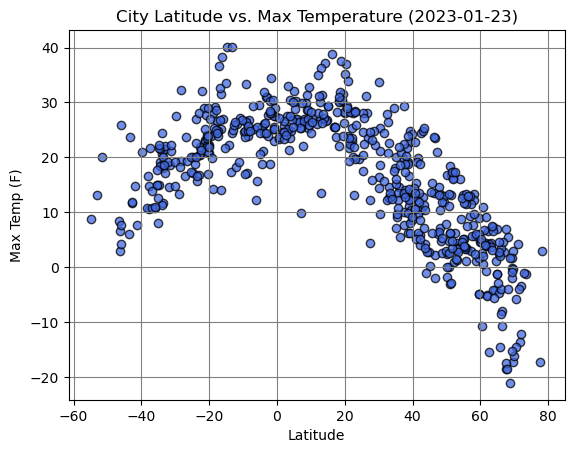

In [10]:
import datetime as dt

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], facecolor='royalblue', 
            edgecolors='black', marker="o", alpha=0.75)


plt.title('City Latitude vs. Max Temperature' + ' (' + str(dt.datetime.now().date()) + ')')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True, which='major',axis="both", linestyle="-", color="grey")

plt.savefig('../JSON HW/City Latitude vs. MaxTemp.png')

plt.show()

#### Latitude Vs. Humidity

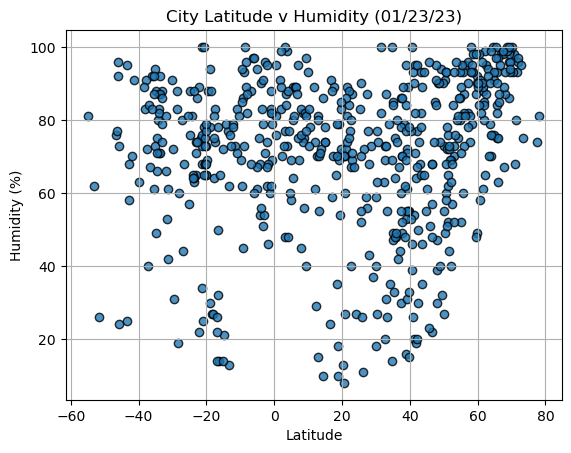

In [12]:
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../JSON HW/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

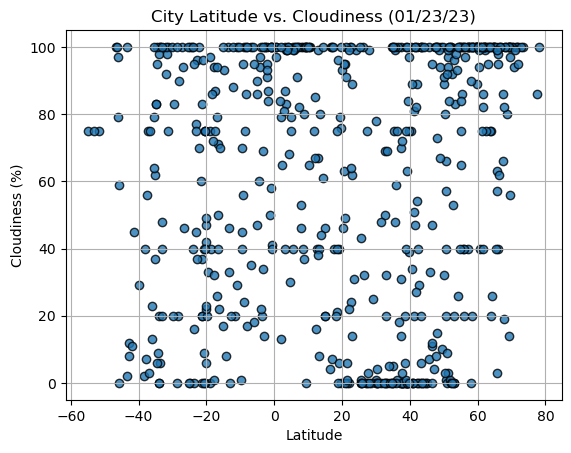

In [13]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../JSON HW/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

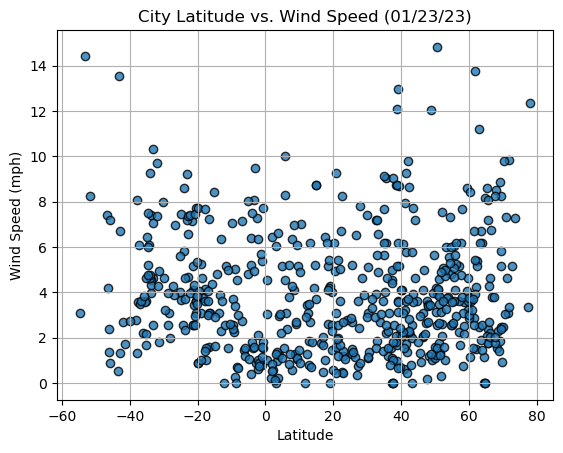

In [15]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../JSON HW/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
ue
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [20]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,
0,0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [21]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City_ID.3,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,,
2,2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825364


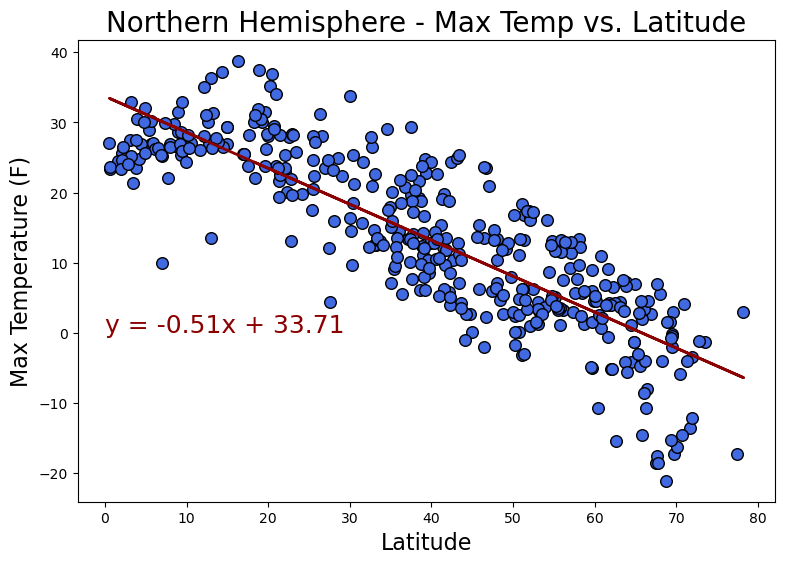

In [23]:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. MaxTemp_North.png')

plt.show()

The r-value is: 0.6419546065421801


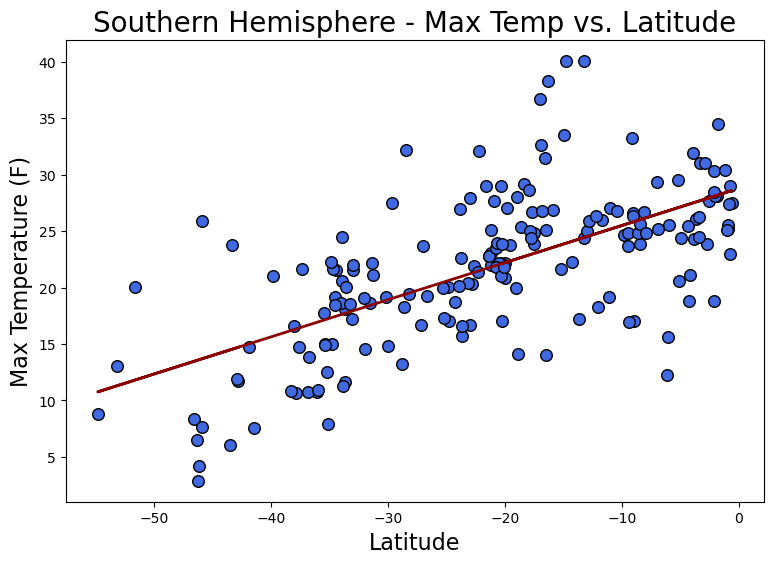

In [33]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 50),fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. MaxTemp_South.png')

plt.show()

**Discussion about the linear relationship:** There is a positive correlation between max temperature and latitude in the southern hempishere and a negative correlation beteween max temperature and latitude in the northern hempishere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


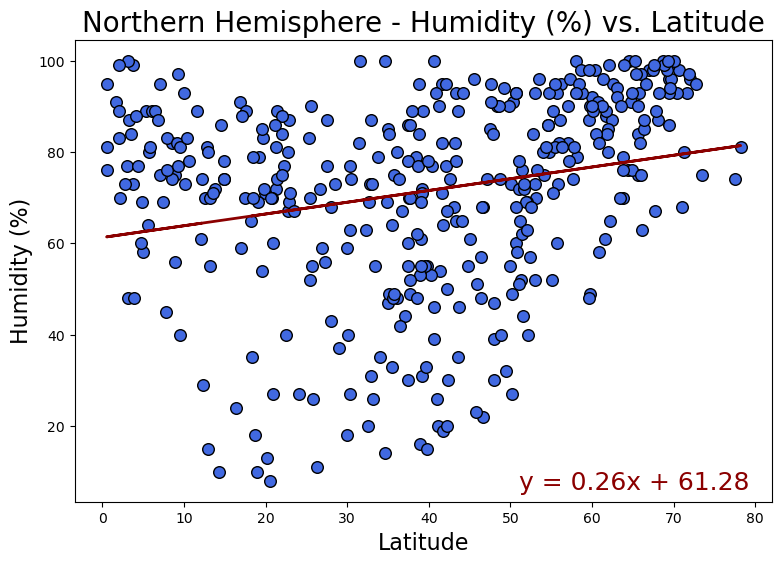

In [36]:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Humidity_North.png')

plt.show()

The r-value is: 0.016759316950056818


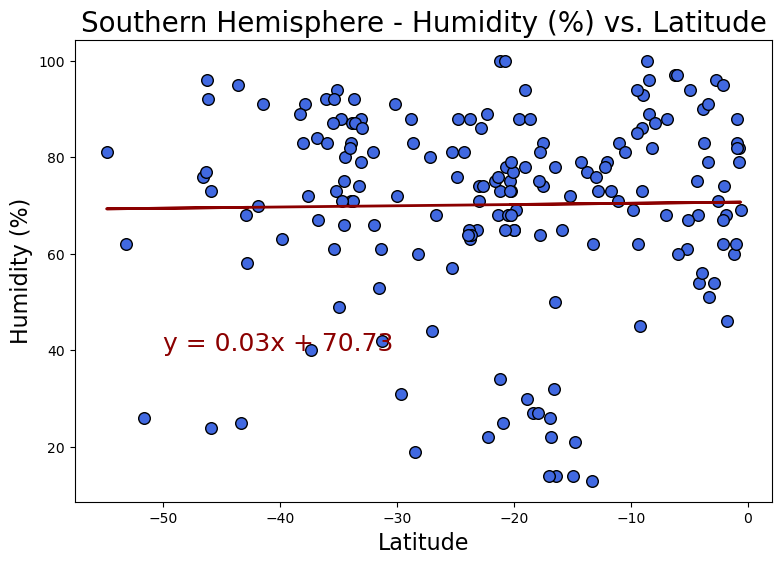

In [38]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
:
regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-50,40), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Humidity_South.png')

plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidty and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


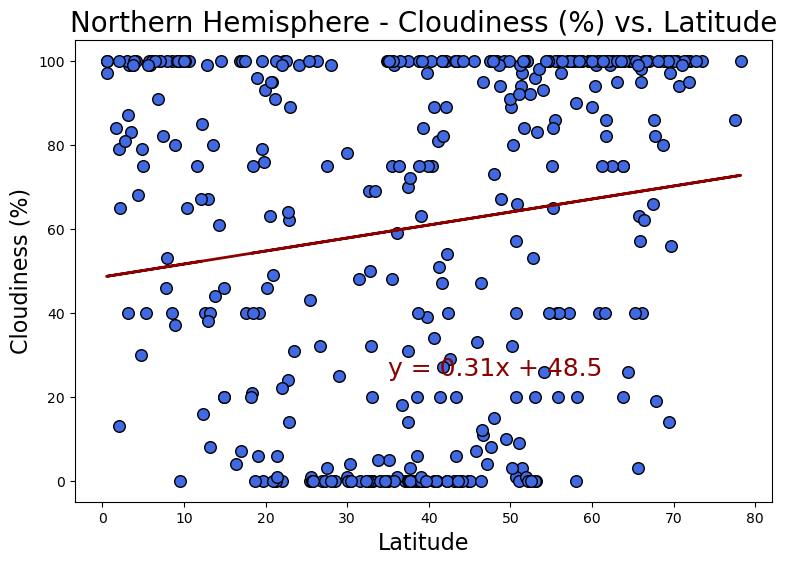

In [39]:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Cloudiness_North.png')

plt.show()

The r-value is: 0.14341322916643243


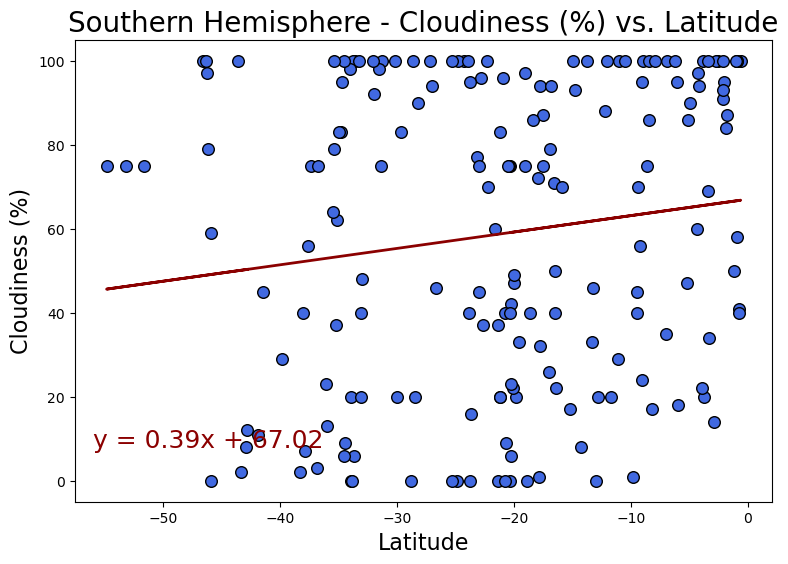

In [41]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Cloudiness_South.png')

plt.show()

**Discussion about the linear relationship:** There is almost no correlation between cloudiness and latitude. With both hemispheres having 0% and 100% cloudiness regardless of latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1743466729090334


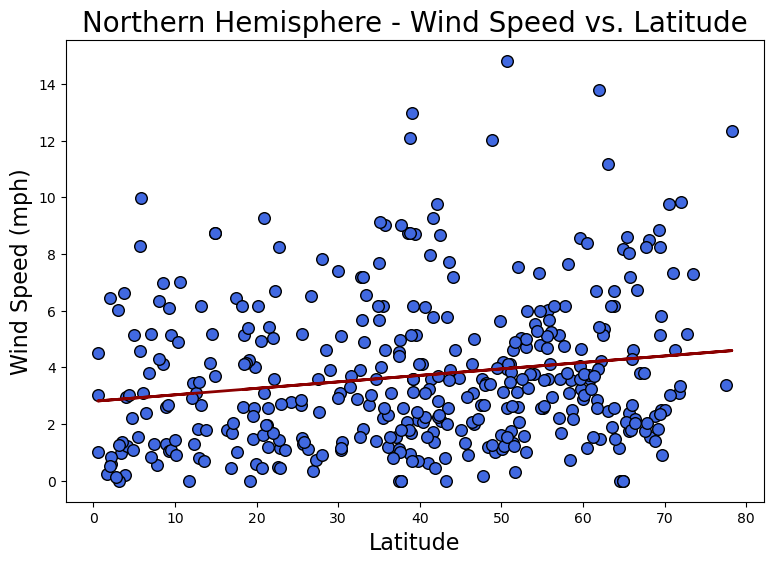

In [42]:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='darkred')

print(f'The r-value is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Wind_North.png')

plt.show()

The r-squared is: -0.24947753546264592


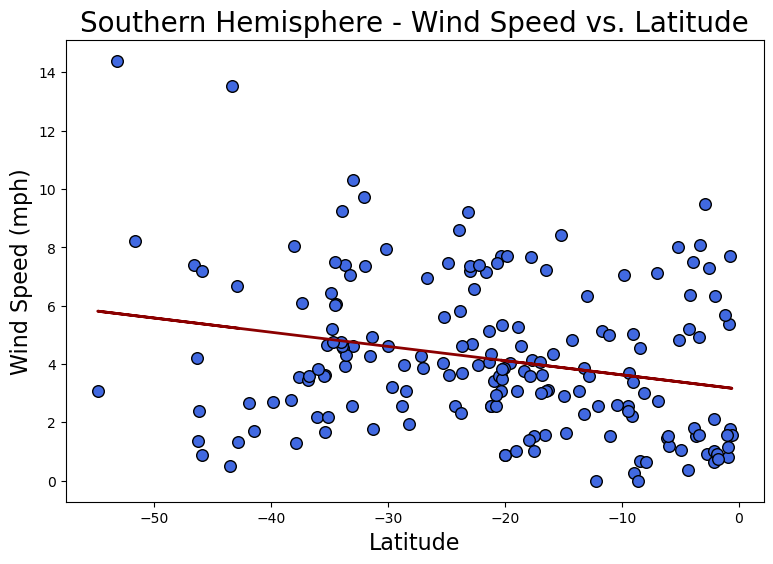

In [43]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')

print(f'The r-squared is: {rvalue}')

plt.savefig('../JSON HW/City Latitude vs. Wind_South.png')

plt.show()